In [39]:
%load_ext autoreload
%autoreload 2
from imports.networks import *
from imports.data import *
from imports.params import p
from imports.utility import *
# from os import listdir
# import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
sw_path = "flamingo_0077/flamingo_0077.hdf5"
soap_path = "halo_properties_0077.hdf5"
data = Data(p, soap_path=soap_path, sw_path=sw_path)
data.make_obs_dataset(filepath=f"{p['base_data_path']}/obs_data_{p_to_filename(p)}_M1e13_rad1Mpc")

In [64]:
model = NeuralNetwork(lr=0.0001, batch_size=2)
model.set_convolutional_model()
model.set_optimizer()
# data.trainx = data.trainx[:,1,:,:].reshape(137, 1, 64, 64)
# data.valx = data.valx[:,1,:,:].reshape(19, 1, 64, 64)
# data.testx = data.testx[:,1,:,:].reshape(39, 1, 64, 64)

model.train(data, nr_epochs=10)

Epoch: 0, done in 1.33 seconds
Validation loss: 1.6916546821594238. Train loss: 1.8719485998153687
Epoch: 1, done in 1.04 seconds
Validation loss: 0.971458911895752. Train loss: 1.0980771780014038
Epoch: 2, done in 1.05 seconds
Validation loss: 1.5794079303741455. Train loss: 0.6601222157478333
Epoch: 3, done in 1.36 seconds
Validation loss: 1.4666917324066162. Train loss: 0.2722548842430115
Epoch: 4, done in 1.33 seconds
Validation loss: 1.536001205444336. Train loss: 0.28386956453323364
Epoch: 5, done in 1.28 seconds
Validation loss: 1.4671565294265747. Train loss: 0.2033509761095047
Epoch: 6, done in 1.26 seconds
Validation loss: 1.3053793907165527. Train loss: 0.15977843105793
Epoch: 7, done in 1.40 seconds
Validation loss: 1.3676106929779053. Train loss: 0.10519128292798996
Epoch: 8, done in 1.26 seconds
Validation loss: 1.282516598701477. Train loss: 0.10594309866428375
Epoch: 9, done in 1.31 seconds
Validation loss: 1.3346372842788696. Train loss: 0.06507658213376999


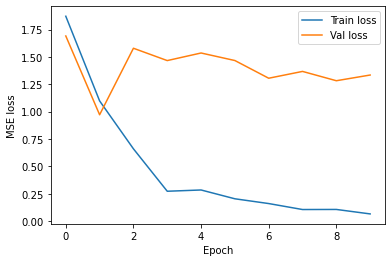

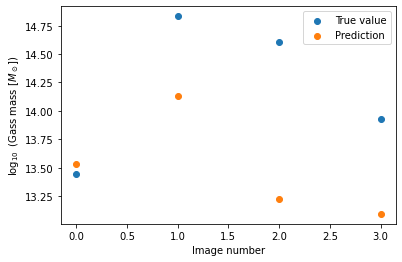

In [65]:
import matplotlib.pyplot as plt
with torch.no_grad():
    plt.plot(model.epochs, model.losses, label="Train loss")
    plt.plot(model.epochs, model.val_losses, label="Val loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE loss")
    plt.legend()
    plt.show()


    prediction = model.model(torch.Tensor(data.testx))
    prediction = prediction * data.std_y + data.mean_y

    testx = data.testx * data.std_x[np.newaxis, :, np.newaxis, np.newaxis] + data.mean_x[np.newaxis, :, np.newaxis, np.newaxis]
    testy = data.testy * data.std_y + data.mean_y

    # print(prediction.T)
    # print(testy)
    plt.scatter(range(len(testy)), testy, label="True value")
    plt.scatter(range(len(testy)), prediction, label="Prediction")
    plt.xlabel("Image number")
    plt.ylabel("$\log_{10}$ (Gass mass [$M_\odot$])")
    plt.legend()
    plt.show()

[-1.3155789  -0.86166424  1.1811382   0.5271042   0.8643007  -0.3382492
 -1.6087369  -0.5059072   0.15900567  0.1292744   0.50153756 -1.5133338
 -0.08523086  1.7419004 ]


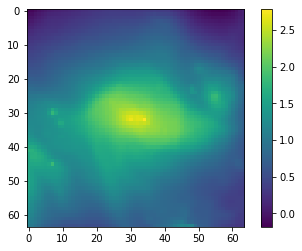

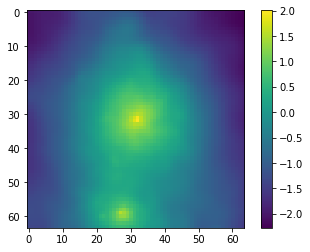

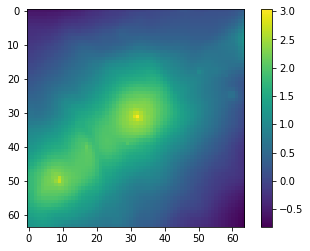

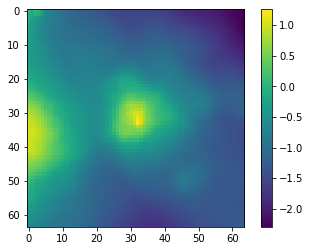

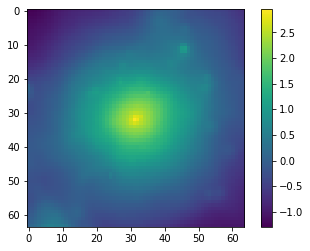

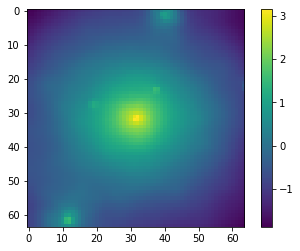

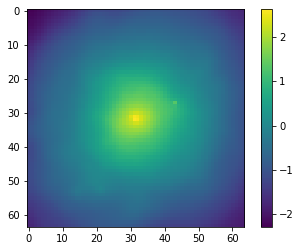

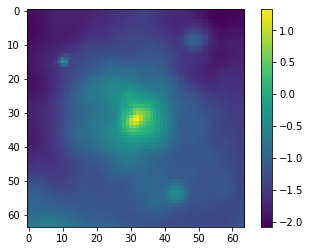

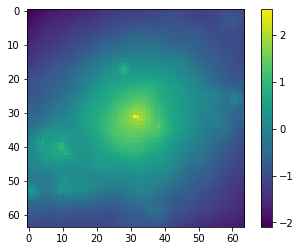

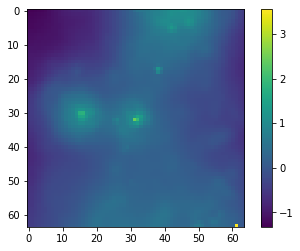

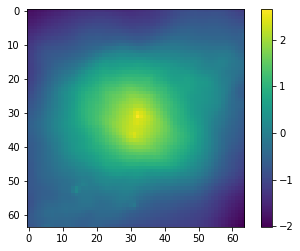

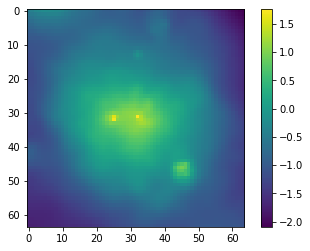

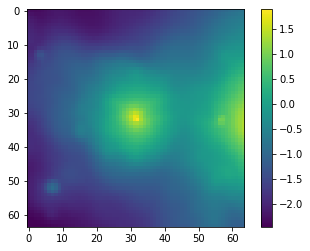

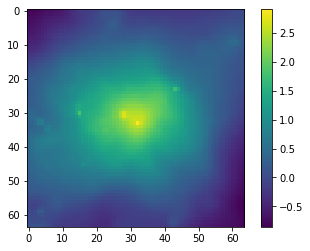

In [66]:
# test = data.testx * data.std_x + data.mean_x
# print(data.trainx[0,0])
# print(data.trainx[1,0])
print(data.trainy)
# print(data.trainy[1])
for i in range(len(data.trainy)):
    plt.imshow(data.trainx[i,0])
    plt.colorbar()
    plt.show()

In [56]:
test = np.load(f"{p['base_data_path']}/obs_data_{p_to_filename(p)}_M1e13_rad1Mpc_halo_indices.npy")
print(test)

[ 4243878  6073953  5455886 11024850  3628391 12901838  6263811   920565
  1036212 11789570  4445297       27  3628265  6560773 10712270  7952153
  5455314  8879505  9097200  6453008]


In [62]:
print(data.soap_file[p["selection_type"]+"/TotalMass"][np.sort(test)])

[1.1503640e+14 4.9134426e+13 8.6311663e+13 1.9598795e+14 3.0511448e+13
 1.2747463e+13 1.1970933e+14 4.0462028e+14 1.7660906e+13 1.1218455e+13
 6.1503932e+13 6.8059770e+14 1.8939088e+14 3.0786326e+14 4.7059098e+14
 9.9725705e+14 3.1665935e+14 1.6612934e+13 8.5624468e+13 2.8037547e+13]
